# Exploratory Data Analysis on Tom Hanks' acting career

## 1 Introduction

### 1.1 Aims and Objectives

This project will explore the acting career of Tom Hanks, a major Hollywood star and one of my favourite actors. After collecting data on all movies starring Tom Hanks from 1980 until July 2022 via an API from the Open Movie Database, I will preprocess, clean and validate the collected data.

Then, I will explore the following questions with exploratory data analysis:
- Which movies are most highly rated?
- Which movies were most successful at the box office?
- Did the best rated movies also bring in the most money?
- How are movie ratings and box office revenues related?

### 1.2 Sections of this project report
1. Introduction
2. The Data
    2.1 Dataset Creation with OMDb's API
    2.2 Data Cleaning and Validation
3. Exploratory data analysis
    3.1 Snapshot of Tom Hanks' acting career
4. Conclusion

### 1.3 Data Ethics

All content on the Open Movie Database (OMDb) is licensed under [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/). This license allows for sharing and adaptation of the data, provided that the source of the data is acknowledged and it is not used for commercial purposes.



In [3]:
import pandas as pd
import requests
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## 2 The Data

### 2.1 Dataset Creation with OMDb's API

To begin with, I requested an API key from the [Open Movie Database](http://www.omdbapi.com/) and assigned to a variable. Then, I manually created a list containing the movie IDs of every movie starring Tom Hanks listed in the [Internet Movie Database (IMDb)](https://www.imdb.com/name/nm0000158/?ref_=fn_al_nm_1#actor).

In [4]:
api_key = '96f170c9'

In [5]:
movie_ids = ['tt0080850', 'tt0084314', 'tt0088161', 'tt0086927', 'tt0089543', 'tt0090274', 'tt0091541', 
             'tt0091653', 'tt0091019', 'tt0092925', 'tt0094737', 'tt0095927', 'tt0096734', 'tt0098536',
             'tt0099892', 'tt0099165', 'tt0105211', 'tt0104694', 'tt0108160', 'tt0107818', 'tt0109830',
             'tt0112384', 'tt0114709', 'tt0117887', 'tt0120815', 'tt0128853', 'tt0120363', 'tt0120689',
             'tt0162222', 'tt0257044', 'tt0264464', 'tt0335245', 'tt0362227', 'tt0377057', 'tt0338348',
             'tt0317219', 'tt0382625', 'tt0462538', 'tt0472062', 'tt0460810', 'tt0808151', 'tt0435761',
             'tt1583420', 'tt0477302', 'tt1371111', 'tt1535109', 'tt2140373', 'tt3682448', 'tt3501590',
             'tt2980210', 'tt3263904', 'tt3062096', 'tt4287320', 'tt6294822', 'tt1979376', 'tt3224458',
             'tt6048922', 'tt6878306', 'tt3420504', 'tt3704428'
            ]

After initialising an empty list to store the data, I set up a loop to pull data on each movie via the API and store it in a list of dictionaries. Then, I used this list of dictionaries to set up my dataframe.

In [6]:
#Initialise empty list.
movies = []

#Set up API loop.
for movie in movie_ids:
    url = 'http://www.omdbapi.com/?apikey='+api_key+'&i='+movie
    response_movie = requests.get(url).json()
    response_movie_copy = response_movie.copy()
    movies.append(response_movie_copy)

#Save list of dictionaries into dataframe.    
movie_data = pd.DataFrame(movies)

Initial visual inspection suggests that the data import has been a success and each column contains the correct values.

In [7]:
movie_data.head(3)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,He Knows You're Alone,1980,R,29 Aug 1980,94 min,"Horror, Thriller",Armand Mastroianni,Scott Parker,"Don Scardino, Caitlin O'Heaney, Elizabeth Kemp",A young bride-to-be is being stalked upon by a...,...,N/A,5.0,"3,764",tt0080850,movie,01 Jan 2009,"$4,875,436",N/A,N/A,True
1,Mazes and Monsters,1982,PG,28 Dec 1982,100 min,"Adventure, Drama, Fantasy",Steven Hilliard Stern,"Tom Lazarus, Rona Jaffe","Tom Hanks, Wendy Crewson, David Wysocki","Bound together by a desire to play ""Mazes and ...",...,N/A,4.1,"3,702",tt0084314,movie,25 Oct 2005,N/A,N/A,N/A,True
2,Splash,1983,PG,09 Mar 1984,111 min,"Comedy, Fantasy, Romance",Ron Howard,"Brian Grazer, Bruce Jay Friedman, Lowell Ganz","Tom Hanks, Daryl Hannah, Eugene Levy",A young man is reunited with a mermaid who sav...,...,71,6.3,"76,707",tt0088161,movie,N/A,"$69,821,334",N/A,N/A,True


### 2.2 Data Cleaning and Validation

To ensure a clean dataset, I now inspect the dataset for missing values and drop two columns which only contain missing values. While the missing values in the columns 'Awards', 'Metascore' and 'DVD' will not impact the analysis, I am concerned about the five missing values in 'BoxOffice', which measures box office revenue.

However, none of these five movies received a rating within the top 20 percent, which suggests only limited publicity. Hence, I assume that the missing box office revenues are unlikely to have been exceptionally high and replace the missing values with the median value of 'BoxOffice' (after converting the column to the correct data type down below). I am using the median instead of the mean, since the distribution of box office revenue in this dataset is positively skewed due to very few movies performing extremely well at the box office.

In [8]:
#Checking for missing values
movie_data.isnull().sum()

#Indicates no missing values. However, visual inspection already showed "N/A" values.
#So, replace all 'N/A' values with 'np.NaN' values.

movie_data = movie_data.replace('N/A', np.NaN)

#Checking for missing values again
movie_data.isnull().sum()

Title          0
Year           0
Rated          0
Released       0
Runtime        0
Genre          0
Director       0
Writer         0
Actors         0
Plot           0
Language       0
Country        0
Awards         9
Poster         0
Ratings        0
Metascore      5
imdbRating     0
imdbVotes      0
imdbID         0
Type           0
DVD            2
BoxOffice      5
Production    60
Website       60
Response       0
dtype: int64

In [9]:
#As both columns 'Production' and 'Website' contain only missing values, drop these.

movie_data = movie_data.drop(['Production', 'Website'], axis=1)

In [10]:
#Inspecting the five movies which contain missing values for box office revenue.

movie_data[movie_data['BoxOffice'].isna()]

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Response
1,Mazes and Monsters,1982,PG,28 Dec 1982,100 min,"Adventure, Drama, Fantasy",Steven Hilliard Stern,"Tom Lazarus, Rona Jaffe","Tom Hanks, Wendy Crewson, David Wysocki","Bound together by a desire to play ""Mazes and ...",...,https://m.media-amazon.com/images/M/MV5BMzIyZj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,4.1,"3,702",tt0084314,movie,25 Oct 2005,NaN,True
33,Elvis Has Left the Building,2004,PG-13,27 Aug 2004,90 min,Comedy,Joel Zwick,"Mitchell P Ganem, Adam-Michael Garber","Kim Basinger, John Corbett, Annie Potts",A fugitive Pink Lady rep hooks up with a bored...,...,https://m.media-amazon.com/images/M/MV5BMjAwZW...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,5.1,"2,847",tt0377057,movie,02 Aug 2005,NaN,True
48,Ithaca,2015,PG,09 Sep 2016,96 min,"Drama, War",Meg Ryan,"Erik Jendresen, William Saroyan","Alex Neustaedter, Meg Ryan, Sam Shepard","With his older brother off to war, fourteen-ye...",...,https://m.media-amazon.com/images/M/MV5BMTczNT...,"[{'Source': 'Internet Movie Database', 'Value'...",36,5.4,"2,819",tt3501590,movie,04 Oct 2016,NaN,True
56,Greyhound,2020,PG-13,10 Jul 2020,91 min,"Action, Drama, History",Aaron Schneider,"Tom Hanks, C.S. Forester","Tom Hanks, Elisabeth Shue, Stephen Graham",Several months after the U.S. entry into World...,...,https://m.media-amazon.com/images/M/MV5BZTFkZj...,"[{'Source': 'Internet Movie Database', 'Value'...",64,7.0,"94,771",tt6048922,movie,10 Jul 2020,NaN,True
58,Finch,2021,PG-13,05 Nov 2021,115 min,"Adventure, Drama, Sci-Fi",Miguel Sapochnik,"Craig Luck, Ivor Powell","Tom Hanks, Caleb Landry Jones, Marie Wagenman","On a post-apocalyptic Earth, a robot, built to...",...,https://m.media-amazon.com/images/M/MV5BZTMxYj...,"[{'Source': 'Internet Movie Database', 'Value'...",57,6.8,"79,054",tt3420504,movie,05 Nov 2021,NaN,True


The second step in preprocessing my dataset for analysis is the transformation of each column to the correct data type. Finally, before proceeding to the analysis stage of this project, I validate that the dataset in fact only contains movies and not any TV-shows or other media types.

In [11]:
###Converting  columns to correct data type.###

#Strings
movie_data['Title'] = movie_data['Title'].astype('string')
movie_data['Director'] = movie_data['Director'].astype('string')
movie_data['Writer'] = movie_data['Writer'].astype('string')
movie_data['Actors'] = movie_data['Actors'].astype('string')
movie_data['Plot'] = movie_data['Plot'].astype('string')
movie_data['Awards'] = movie_data['Awards'].astype('string')
movie_data['Poster'] = movie_data['Poster'].astype('string')
movie_data['imdbID'] = movie_data['imdbID'].astype('string')

#Categories
movie_data['Rated'] = movie_data['Rated'].astype('category')
movie_data['Language'] = movie_data['Language'].astype('category')
movie_data['Country'] = movie_data['Country'].astype('category')
movie_data['Type'] = movie_data['Type'].astype('category')

#DateTime
movie_data['Year'] = pd.to_datetime(movie_data['Year'])
movie_data['Released'] = pd.to_datetime(movie_data['Released'])
movie_data['DVD'] = pd.to_datetime(movie_data['DVD'])

#Boolean
movie_data['Response'] = movie_data['Response'].astype('bool')

#Numeric
# Converting 'Metascore' to float, instead of integer, because only float can deal with 'NaN' values.
movie_data['Metascore'] = movie_data['Metascore'].astype('float')
movie_data['imdbRating'] = movie_data['imdbRating'].astype('float')

###Special cases###

#Column 'Ratings' contains a list. Will remain 'object'.

#Column 'Runtime' must first be stripped of " min" string, before transforming to numeric.
movie_data['Runtime'] = movie_data['Runtime'].astype('string')
movie_data['Runtime'] = movie_data['Runtime'].str.strip(' min')
movie_data['Runtime'] = movie_data['Runtime'].astype('int64')

#Column 'imdbVotes' contains a comma that prevents conversion to numeric.
#Converting to string, replacing the comma.
movie_data['imdbVotes'] = movie_data['imdbVotes'].astype('string')
movie_data['imdbVotes'] = movie_data['imdbVotes'].str.replace(',', '')
#One NaN value was displayed as '<NA>'. Fixing this, so 'NaN' is displayed again.
movie_data['imdbVotes'] = movie_data['imdbVotes'].astype('object')
movie_data['imdbVotes'] = movie_data['imdbVotes'].replace(np.NaN, np.NaN)
#Converting to float. Not int64, because only float can handle 'NaN' values.
movie_data['imdbVotes'] = movie_data['imdbVotes'].astype('float')

In [ ]:
#Column Box office contains commas and '$' symbol.
#Converting to string, stripping of comma and '$' symbol.
movie_data['BoxOffice'] = movie_data['BoxOffice'].astype('string')
movie_data['BoxOffice'] = movie_data['BoxOffice'].str.replace(',', '')
movie_data['BoxOffice'] = movie_data['BoxOffice'].str.replace('$', '')
#NaN values were displayed as '<NA>'. Fixing this, so 'NaN' is displayed again.
movie_data['BoxOffice'] = movie_data['BoxOffice'].astype('object')
movie_data['BoxOffice'] = movie_data['BoxOffice'].replace(np.NaN, np.NaN)
#Converting to float. Not int64, because only float can handle 'NaN' values.
movie_data['BoxOffice'] = movie_data['BoxOffice'].astype('float')

In [12]:
#Replacing missing values in column 'BoxOffice' with the median value of 'BoxOffice'.
movie_data['BoxOffice'] = movie_data['BoxOffice'].fillna(movie_data['BoxOffice'].median())

In [51]:
#Converting 'Box Office' into millions.
movie_data['BoxOffice'] = movie_data['BoxOffice']/1000000

In [13]:
#Checking that the dataframe in fact only contains movies.
movie_data['Type'].value_counts()

movie    60
Name: Type, dtype: int64

## 3 Exploratory Data Analysis

### 3.1 Snapshot of Tom Hanks' acting career 


#### When did it all begin?

Tom Hanks has impressed audiences around the world for 42 years now, with his first movie, the horror thriller _He Knows You're Alone_ getting released in 1980. Since then Tom Hanks has starred in 60 movies, which corresponds to an average of 1.4 yearly movie releases.

#### Which movies are the best? Which one is the worst?

The Internet Movie Database (IMDb) allows its users to rate each movie on a scale from one to ten, with ten being the best. The _Top 250 Movies_ on [IMDb website](https://www.imdb.com/chart/top/?ref_=nv_mv_250) shows, that only 45 movies have ever received a rating of 8.5 or higher, while only four movies have managed to score a rating of nine stars or higher.

While Tom Hanks' lowest scoring movie, an adventure fantasy drama called _Mazes and Monsters_ from 1982, only managed to receive a rating of 4.1 stars, his six highest ranking movies all scored over 8.0 stars. Securing each of them a spot in the IMDb Top 250 ranking. 

Tom Hanks' single highest ranking movie _Forrest Gump_  even scored a whopping 8.8 stars. Both _Saving Private Ryan_ and _The Green Mile_ received a rating of 8.6 stars. _Toy Story_ and _Toy Story 3_, in which Tom Hanks is Woody's voice actor, rank at 8.3 stars, respectively. Finally, _Catch Me If You Can_'s 8.1 stars make it the sixth movie within the IMDb Top 250 Movies.

Displaying the achieved rankings of all 60 movies over time shows an especially successful decade from the early 1990s until the early 2000s. This also coincides with Tom Hanks winning two consecutive Academy Awards for best actor in _Philadelphia_ and _Forrest Gump_ in 1993 and 1994, respectively. The average IMDb rating for his movies during the decade following his first Academy Award (1993 - 2002) is 7.8 stars, compared to the career average of 6.8 stars.

In [15]:
#Number of movies.
print('Number of movies: ' + str(len(movie_data)))

#When did the first one come out?
print('First movie was released in: ' + str(min(movie_data['Year'])))

#How many years have passed since his first movie?

#Calculate timedelta (in days) between first movie and last movie.
days_active = max(movie_data['Year']) - min(movie_data['Year'])
#Transform to number of years and float type.
years_active = days_active / np.timedelta64(1, 'Y')
years_active = round(years_active)

print('Tom Hanks has been an actor for ' + str(years_active) + ' years.')

#How many movies on average per year?

avg_movies_per_year = len(movie_data)/years_active
print('Average movies per year: ' + str(round(avg_movies_per_year, 1)))

Number of movies: 60
First movie was released in: 1980-01-01 00:00:00
Tom Hanks has been an actor for 42 years.
Average movies per year: 1.4


In [16]:
#Average imdb rating.
print('Average IMDb rating: ' + str(round(movie_data['imdbRating'].mean(),1)))

Average IMDb rating: 6.8


In [17]:
#Movie with lowest rating.
movie_data[movie_data['imdbRating'] == movie_data['imdbRating'].min()]

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Response
1,Mazes and Monsters,1982-01-01,PG,1982-12-28,100,"Adventure, Drama, Fantasy",Steven Hilliard Stern,"Tom Lazarus, Rona Jaffe","Tom Hanks, Wendy Crewson, David Wysocki","Bound together by a desire to play ""Mazes and ...",...,https://m.media-amazon.com/images/M/MV5BMzIyZj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,4.1,3702.0,tt0084314,movie,2005-10-25,72313754.0,True


In [18]:
#Movies with imdb rating of 8+.
movie_data[movie_data['imdbRating'] >= 8]

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Response
20,Forrest Gump,1994-01-01,PG-13,1994-07-06,142,"Drama, Romance",Robert Zemeckis,"Winston Groom, Eric Roth","Tom Hanks, Robin Wright, Gary Sinise","The presidencies of Kennedy and Johnson, the V...",...,https://m.media-amazon.com/images/M/MV5BNWIwOD...,"[{'Source': 'Internet Movie Database', 'Value'...",82.0,8.8,2011577.0,tt0109830,movie,2001-08-28,330455270.0,True
22,Toy Story,1995-01-01,G,1995-11-22,81,"Animation, Adventure, Comedy",John Lasseter,"John Lasseter, Pete Docter, Andrew Stanton","Tom Hanks, Tim Allen, Don Rickles",A cowboy doll is profoundly threatened and jea...,...,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,"[{'Source': 'Internet Movie Database', 'Value'...",95.0,8.3,975237.0,tt0114709,movie,2010-03-23,223225679.0,True
24,Saving Private Ryan,1998-01-01,R,1998-07-24,169,"Drama, War",Steven Spielberg,Robert Rodat,"Tom Hanks, Matt Damon, Tom Sizemore","Following the Normandy Landings, a group of U....",...,https://m.media-amazon.com/images/M/MV5BZjhkMD...,"[{'Source': 'Internet Movie Database', 'Value'...",91.0,8.6,1361663.0,tt0120815,movie,2004-05-25,217049603.0,True
27,The Green Mile,1999-01-01,R,1999-12-10,189,"Crime, Drama, Fantasy",Frank Darabont,"Stephen King, Frank Darabont","Tom Hanks, Michael Clarke Duncan, David Morse",The lives of guards on Death Row are affected ...,...,https://m.media-amazon.com/images/M/MV5BMTUxMz...,"[{'Source': 'Internet Movie Database', 'Value'...",61.0,8.6,1271816.0,tt0120689,movie,2000-06-13,136801374.0,True
30,Catch Me If You Can,2002-01-01,PG-13,2002-12-25,141,"Biography, Crime, Drama",Steven Spielberg,"Jeff Nathanson, Frank Abagnale Jr., Stan Redding","Leonardo DiCaprio, Tom Hanks, Christopher Walken","Barely 21 yet, Frank is a skilled forger who h...",...,https://m.media-amazon.com/images/M/MV5BMTY5Mz...,"[{'Source': 'Internet Movie Database', 'Value'...",75.0,8.1,947212.0,tt0264464,movie,2003-05-06,164615351.0,True
41,Toy Story 3,2010-01-01,G,2010-06-18,103,"Animation, Adventure, Comedy",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,https://m.media-amazon.com/images/M/MV5BMTgxOT...,"[{'Source': 'Internet Movie Database', 'Value'...",92.0,8.3,822594.0,tt0435761,movie,2010-11-02,415004880.0,True


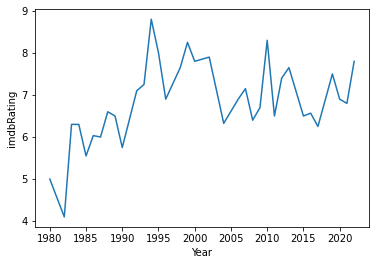

In [28]:
# Rankings of Tom Hanks movies over time.

sns.lineplot(data=movie_data, x="Year", y="imdbRating", ci=None)
plt.show()

In [42]:
#Set up boolean mask to select best decade
mask = (movie_data['Year'] > '1992-01-01') & (movie_data['Year'] <= '2002-01-01')
best_decade = movie_data.loc[mask]

In [45]:
print('Average IMDb rating in best decade: ' + str(round(best_decade['imdbRating'].mean(),1)))

Average IMDb rating in best decade: 7.8


#### Did the best rated movies also bring in the most money?

One additional way to measure a movie's success is by how much money it made at the box office. Did Tom Hanks' best rated movies also make the most money for their respective production companies?

The histogram of box office revenue shows a highly positively skewed distribution. Expectedly, the mean box office revenue, which amounts to just over 100 million USD, is significantly higher than the median of 72.3 million USD.

As for the best performing movies, only two of our previous six movies remain at the top. _Toy Story 3_ and _Forrest Gump_ rank at the second and third spot, with a box office revenue of 415 million USD and 330 million USD, respectively. The highest ever box office revenue of any Tom Hanks movie was achieved by _Toy Story 4_, which was released in 2019 and brought in more than 434 million USD.

In [55]:
print('Mean box office revenue: ' + str(round(movie_data['BoxOffice'].mean(),1)) + ' million USD')
print('Median box office revenue: ' + str(round(movie_data['BoxOffice'].median(),1))+ ' million USD')

Mean box office revenue: 100.2 million USD
Median box office revenue: 72.3 million USD


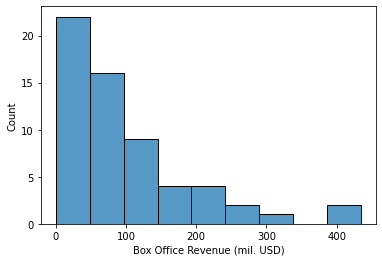

In [65]:
ax = sns.histplot(
    data = movie_data,
    x = 'BoxOffice',
    )
ax.set(xlabel='Box Office Revenue (mil. USD)')
plt.show()

In [66]:
# Top 6 by revenue.

movie_data.sort_values(['BoxOffice'], ascending=False).head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Response
54,Toy Story 4,2019-01-01,G,2019-06-21,100,"Animation, Adventure, Comedy",Josh Cooley,"John Lasseter, Andrew Stanton, Josh Cooley","Tom Hanks, Tim Allen, Annie Potts","When a new toy called ""Forky"" joins Woody and ...",...,https://m.media-amazon.com/images/M/MV5BMTYzMD...,"[{'Source': 'Internet Movie Database', 'Value'...",84.0,7.7,243754.0,tt1979376,movie,2019-10-01,434.038008,True
41,Toy Story 3,2010-01-01,G,2010-06-18,103,"Animation, Adventure, Comedy",Lee Unkrich,"John Lasseter, Andrew Stanton, Lee Unkrich","Tom Hanks, Tim Allen, Joan Cusack",The toys are mistakenly delivered to a day-car...,...,https://m.media-amazon.com/images/M/MV5BMTgxOT...,"[{'Source': 'Internet Movie Database', 'Value'...",92.0,8.3,822594.0,tt0435761,movie,2010-11-02,415.004880,True
20,Forrest Gump,1994-01-01,PG-13,1994-07-06,142,"Drama, Romance",Robert Zemeckis,"Winston Groom, Eric Roth","Tom Hanks, Robin Wright, Gary Sinise","The presidencies of Kennedy and Johnson, the V...",...,https://m.media-amazon.com/images/M/MV5BNWIwOD...,"[{'Source': 'Internet Movie Database', 'Value'...",82.0,8.8,2011577.0,tt0109830,movie,2001-08-28,330.455270,True
26,Toy Story 2,1999-01-01,G,1999-11-24,92,"Animation, Adventure, Comedy","John Lasseter, Ash Brannon, Lee Unkrich","John Lasseter, Pete Docter, Ash Brannon","Tom Hanks, Tim Allen, Joan Cusack","When Woody is stolen by a toy collector, Buzz ...",...,https://m.media-amazon.com/images/M/MV5BMWM5ZD...,"[{'Source': 'Internet Movie Database', 'Value'...",88.0,7.9,569882.0,tt0120363,movie,2010-03-23,245.852179,True
35,Cars,2006-01-01,G,2006-06-09,117,"Animation, Adventure, Comedy","John Lasseter, Joe Ranft","John Lasseter, Joe Ranft, Jorgen Klubien","Owen Wilson, Bonnie Hunt, Paul Newman",A hot-shot race-car named Lightning McQueen ge...,...,https://m.media-amazon.com/images/M/MV5BMTg5Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",73.0,7.2,409426.0,tt0317219,movie,2006-11-07,244.082982,True


In [ ]:
# Box Office revenue over time.
# Correlation between Box Office revenue and Rating.
# Corr between run time and Rating/Revenue.

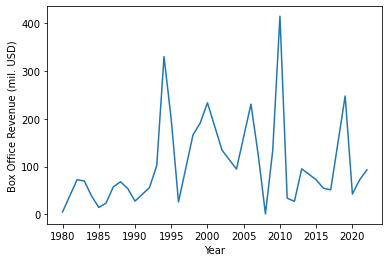

In [68]:
# Box office revenue of Tom Hanks movies over time.

ax = sns.lineplot(data=movie_data,
             x="Year",
             y="BoxOffice",
             ci=None)
ax.set(ylabel='Box Office Revenue (mil. USD)')
plt.show()

#### How are IMDb ratings and box office revenues related?

Plot and corr-matrix show positive relationship between rating and box office revenue. Perhaps even second order polynomial, suggesting increasing returns.

Finally, I wanted to explore the relationship between IMDb ratings and box office revenue. Is there a positive correlation between ratings and revenue? And if so, how strong is this association?

First, I calculated the correlation between box office revenue and IMDb rating, which amounts to 0.62, suggesting a positive relationship between the two variables. Highly rated movies tend to make the most money.

Then, I plotted IMDb rating on the x-axis against box office revenue (in mil. USD) on the y-axis and fitted a linear regression line to the data as seen in the first graph below. A positive association is clearly visible with one additional star on the imdb scale corresponding to about 50 million additional USD in revenue.

However, visual inspection suggests the possibility of a non-linear relationship between the two variables. In the second graph below, I fitted a second order regression line to the data. If confirmed, this relationship would suggest increasing returns for higher ratings.

To confirm whether a linear or quadratic relationship is more suitable, the p-values on the relevant regression coefficients would need to be inspected, which is outside the scope of this project.

In [94]:
corr_matrix = movie_data[['BoxOffice', 'imdbRating']].corr()
print(corr_matrix)

            BoxOffice  imdbRating
BoxOffice    1.000000    0.619394
imdbRating   0.619394    1.000000


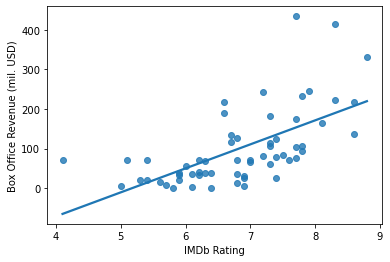

In [84]:
ax = sns.regplot(data=movie_data,
                x="imdbRating",
                y="BoxOffice",
                ci=None,
                order=1)
ax.set(xlabel = 'IMDb Rating', ylabel = 'Box Office Revenue (mil. USD)')
plt.show()

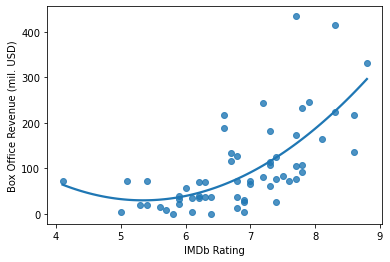

In [85]:
ax = sns.regplot(data=movie_data,
                x="imdbRating",
                y="BoxOffice",
                ci=None,
                order=2)
ax.set(xlabel = 'IMDb Rating', ylabel = 'Box Office Revenue (mil. USD)')
plt.show()

## 4 Conclusion

In this project, I explored the acting career of one of Hollywood's most accomplished actors, Tom Hanks. After pulling data on all movies starring Tom Hanks from 1980 - July 2022 from the Open Movie Database via an API, I provided analysis on the best and worst rated movies in his career.

Then, I delved into the relationship between box office revenue and the public's rating of these movies. Exploratory data analysis strongly suggests a positive relationship between the two variables. One avenue for future analysis might be to further explore the nature of the relationship. This could include the question of whether the variable are related in a linear or quadratic fashion. Furthermore, additional data on the movies' budgets could enhance future projects by providing insights into not just revenue but also profitability.

A limitation of this project is the small sample size of 60 movies. Of course, the focus has been on the career of one particular actor. However, to draw more general conclusions about the industry, a larger sample size would be necessary.